<a href="https://colab.research.google.com/github/Orliluq/Vision-Transformers-Segment-Anything/blob/main/Segment_Anything.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **✅ Cómo predecir con Segment Anything**

1. Prepara tu entorno

In [7]:
!pip install git+https://github.com/facebookresearch/segment-anything.git
!pip install opencv-python matplotlib

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-jfvy2xra
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-jfvy2xra
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done


In [8]:
!git clone https://github.com/facebookresearch/segment-anything.git
%cd segment-anything
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth -O sam_vit_h.pth

Cloning into 'segment-anything'...
remote: Enumerating objects: 304, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 304 (delta 2), reused 1 (delta 1), pack-reused 299 (from 2)
Receiving objects: 100% (304/304), 18.31 MiB | 12.18 MiB/s, done.
Resolving deltas: 100% (159/159), done.
/content/segment-anything
--2025-08-05 19:07:26--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.226.210.15, 13.226.210.111, 13.226.210.25, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.226.210.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h.pth’

sam_vit_h.pth       100%[===================>]   2.39G  44.0MB/s    in 43s     

2025-08-05 19:08:09 (57.1 MB/s) - ‘sam_vit_h.pth’ saved [2564550879/2564550879]



2. Sube tu imagen de prueba

In [9]:
from google.colab import files
uploaded = files.upload()

Saving example.jpg to example.jpg


3. Código para hacer la predicción

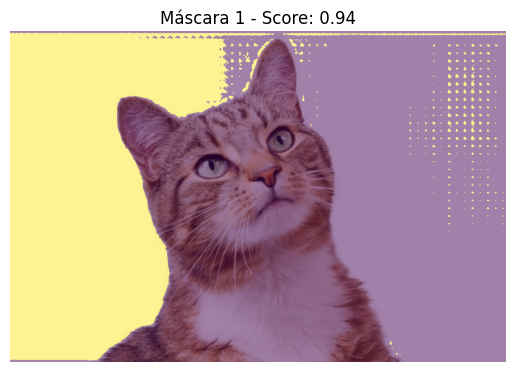

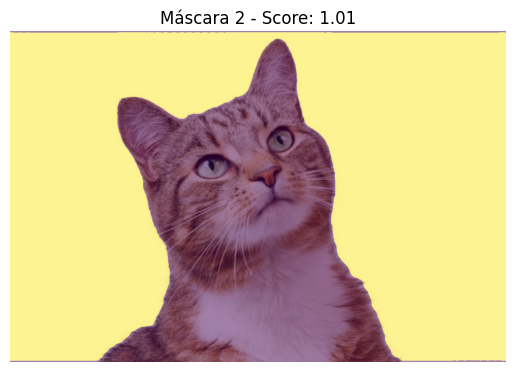

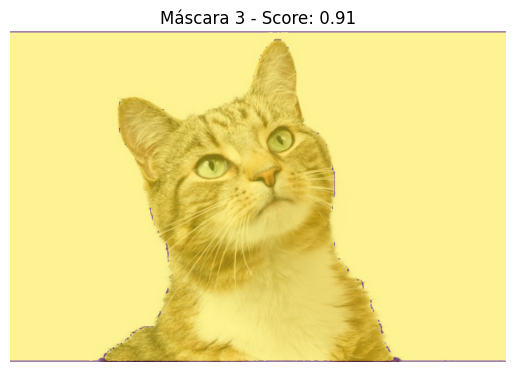

In [10]:
from segment_anything import sam_model_registry, SamPredictor
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar modelo SAM
sam = sam_model_registry["vit_h"](checkpoint="sam_vit_h.pth")
predictor = SamPredictor(sam)

# Cargar la imagen
image = cv2.imread("example.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir a RGB
predictor.set_image(image)

# Definir punto para segmentar (x, y)
input_point = np.array([[100, 150]])
input_label = np.array([1])  # 1 para objeto, 0 para fondo

# Hacer predicción
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

# Mostrar máscaras
for i, mask in enumerate(masks):
    plt.figure()
    plt.title(f"Máscara {i+1} - Score: {scores[i]:.2f}")
    plt.imshow(image)
    plt.imshow(mask, alpha=0.5)
    plt.axis('off')
    plt.show()

In [12]:
sam = sam_model_registry["vit_h"](checkpoint="sam_vit_h.pth")